# Matching Pennies Session Analysis


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Import the analysis functions
# Make sure the .py file is in the same directory as this notebook
from session_analysis import *

# Load and Filter Data
Load data from .parquet file and filter columns where ignore is not = 0

In [2]:
# Load the data
data_path = 'Z:/delab/matchingpennies/matchingpennies_datatable.parquet'
df = load_data(data_path)

print(f"Loaded data shape: {df.shape}")
print("\nColumns in the dataset:")
print(df.columns.tolist())

Loaded data shape: (310470, 26)

Columns in the dataset:
['subjid', 'date', 'protocol', 'sessid', 'trialnum', 'choice', 'reward', 'smoothed_reward_rate', 'comp_prediction', 'min_pvalue', 'pattern', 'pattern_length', 'RT', 'leftlicknum', 'rightlicknum', 'ignore', 'SoundTimestamp', 'ExtendPortTimestamp', 'LickTimestamp', 'left_reward_prob', 'right_reward_prob', 'fluorescence', 'pupil', 'p_stochastic', 'p_leftbias', 'p_rightbias']


# Get available Subjects and Sessions

In [3]:
subjects = df['subjid'].unique()
print(f"Number of unique subjects: {len(subjects)}")
print("Sample subjects:")
print(subjects)

Number of unique subjects: 34
Sample subjects:
['IAA-1125294' 'IAA-1125610' 'IAA-1130713' 'JOA-M-0001' 'JOA-M-0002'
 'JOA-M-0003' 'JOA-M-0004' 'JOA-M-0005' 'JOA-M-0006' 'JOA-M-0007'
 'JOA-M-0008' 'JOA-M-0009' 'JOA-M-0010' 'OLI-M-0064' 'JOA-M-0011'
 'JOA-M-0013' 'JOA-M-0014' 'OLI-M-0066' 'OLI-M-0067' 'JOA-M-0015'
 'JOA-M-0016' 'JOT-M-0002' 'JOT-M-0003' 'JOT-M-0004' 'JOT-M-0005'
 'JOT-M-0006' 'JOT-M-0001' 'JOT-M-0008' 'JOA-M-0022' 'JOA-M-0023'
 'JOA-M-0024' 'JOA-M-0025' 'JOA-M-0026' 'OLI-M-0080']


# Analyze specific Subjects and Sessions

In [5]:
selected_subject = "JOA-M-0022"
subject_sessions = df[df['subjid'] == selected_subject]['sessid'].unique()

print(f"Sessions for subject {selected_subject}:")
print(f"Total number of sessions: {len(subject_sessions)}")
print("\nSession IDs:")
print((subject_sessions)) 

Sessions for subject JOA-M-0022:
Total number of sessions: 21

Session IDs:
[1606. 1607. 1610. 1611. 1639. 1646. 1647. 1659. 1660. 1676. 1687. 1695.
 1696. 1697. 1727. 1734. 1735. 1736. 1763. 1773. 1774.]


In [8]:
subject_id = selected_subject
session_id = 974.0
#0013 sess 974
print(f"Analyzing subject {subject_id}, session {session_id}")

num_trials = len(df[(df['subjid'] == subject_id) & (df['sessid'] == session_id)])
print(f"Number of trials: {num_trials}")

Analyzing subject JOA-M-0013, session 974.0
Number of trials: 342


## 1. Plot Choice History

In [ ]:
# Plot choice history
fig = plot_choice_history(df, subject_id, session_id)
plt.show()
plt.close(fig)

## 2. Plot Reward Rate
Either using default window_size (True) or 10% of Trial number (False)

In [ ]:
fig = plot_reward_rate(df, subject_id, session_id, use_window_size=False)
plt.show()
plt.close(fig)

## 3. Plot Probability of Left Choice

In [ ]:
fig = plot_prob_left(df, subject_id, session_id, use_window_size=False)
plt.show()
plt.close(fig)

## 4. Plot Computer Prediction History

In [ ]:
fig = plot_prediction_history(df, subject_id, session_id)
plt.show()
plt.close(fig)

## 5. Plot Computer Confidence

In [ ]:
fig = plot_computer_confidence(df, subject_id, session_id)
plt.show()
plt.close(fig)

## 6. Analyze Choice Patterns

Entropy for subject JOA-M-0013, session 974.0: 2.9773 bits (max: 3 bits)


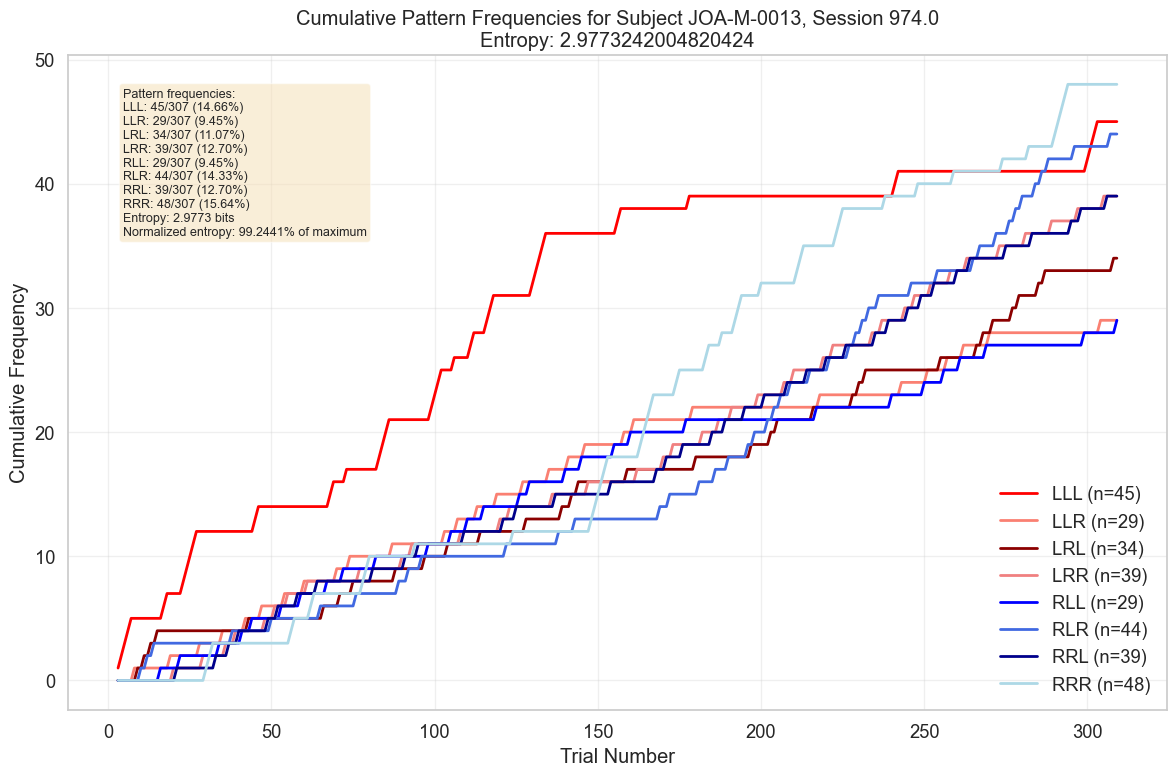

In [9]:
fig = analyze_patterns(df, subject_id, session_id)
plt.show()
plt.close(fig)

## Run All Analyses and Save Results

In [ ]:
analyses = analyze_subject(df, subject_id, session_id, show_plots=False)
for name, fig in analyses.items():
    if fig:
        plt.figure(fig.number)
        plt.show()

## Pooled Analysis of Learning Parametrics across all Animals

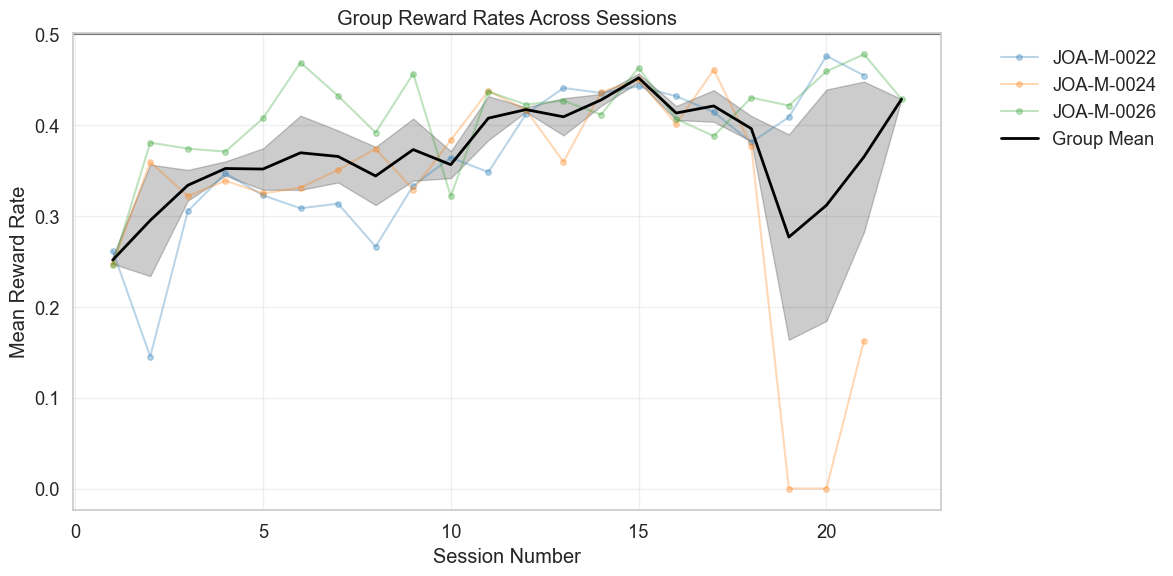

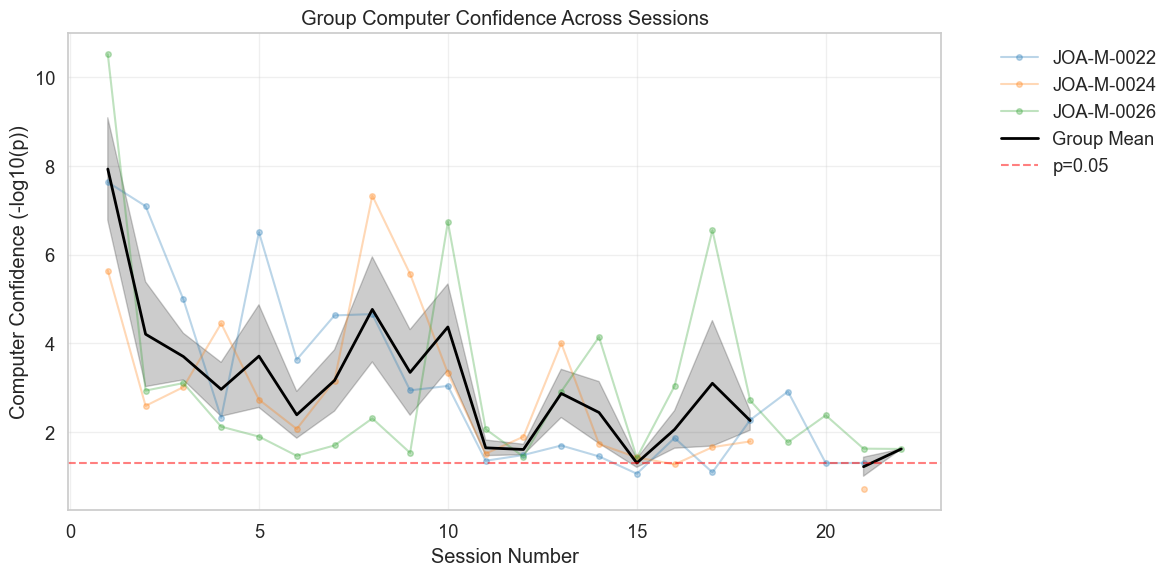

In [7]:
subject_ids = [
    'JOA-M-0022', 
    'JOA-M-0024', 
    'JOA-M-0026'
]
#only include where "protocol" contains f"matching_pennies" .str.contains("MatchingPennies")

reward_fig = plot_group_reward_rates(df, subject_ids)
plt.show()

confidence_fig = plot_group_confidence(df, subject_ids)
plt.show()